# train a titanic  survival  classifier

**Titanic Survival Prediction**

This is a small machine learning project where I trained a **logistic regression model** to predict survival on the Titanic dataset (from Seaborn / Kaggle).

_What it does_
- Loads and cleans the Titanic dataset
- Uses basic features (age, sex, class, fare)
- Trains a logistic regression classifier with scikit-learn
- Evaluates model performance (accuracy, confusion matrix, ROC)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
import collections

In [39]:
# Load Titanic dataset directly from seaborn (easy)
df = sns.load_dataset("titanic")

# Show the first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
x = (df["sex"] == "male").astype(int).to_numpy()

In [42]:
sex_count =collections.Counter(x)

In [43]:
sex_count

Counter({1: 577, 0: 314})

In [44]:
sex_survivor_count = collections.Counter(x[(df["survived"] == 1).to_numpy()])

In [45]:
number_survivors = df['survived'].sum()

In [46]:
print(f'On the Titanic, there were {sex_count[1]} males and {sex_count[0]} females boarded.\n'
      f'Only {sex_survivor_count[1]} males survived, {np.round(sex_survivor_count[1]/number_survivors *100, 2) } percent of the survivors ({number_survivors}) were male')

On the Titanic, there were 577 males and 314 females boarded.
Only 109 males survived, 31.87 percent of the survivors (342) were male


## features

In [47]:
df = df[["pclass", "sex", "age", "fare", "survived"]]
df = df.dropna()  # Drop rows with missing age (simpler than imputation for now)

## encode

In [48]:
# df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["sex"] = (df["sex"] == "female").astype(int)

## split features and labels

In [49]:
X = df.iloc[:, :4]
y = df["survived"]

You split the dataset into:
- Features (X): what the model looks at
- Labels (y): what the model tries to guess

And further into:
- Training data: to learn patterns
- Testing data: to evaluate performance

## train and test  data

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

### Random Forest

In [51]:
X

,pclass,sex,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
885,3,1,39.0,29.1250
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
889,1,0,26.0,30.0000


In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### evaluate

In [53]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [54]:
from sklearn.metrics import recall_score

In [55]:
recall = recall_score(y_test, y_pred)

In [56]:
recall

0.6964285714285714

#### feature importance

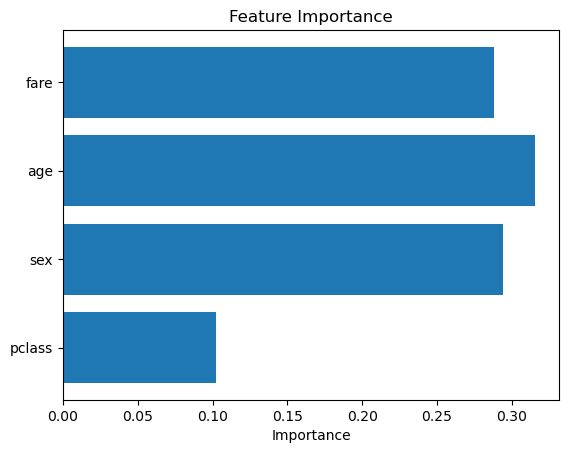

In [57]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

What does the trained model actually do?

In short:

The model has learned patterns in the training data that help it predict whether a passenger survived the Titanic sinking, based on certain features like age, fare, class, and sex.

Concretely:

- It’s a classification model, trained to output either 0 (did not survive) or 1 (survived).
- You gave it examples (data rows with features + known outcomes), and it learned relationships.
- When you pass in new, unseen data (e.g. a person’s age, class, fare, sex), it will predict the survival outcome based on what it learned.

In [58]:
# Predict survival of a hypothetical passenger
new_passenger = pd.DataFrame({
    "pclass": [1],
    "sex": [0],       # 0 = male
    "age": [22],
    "fare": [7.25]
})

prediction = model.predict(new_passenger)
print(prediction)  # Output: [0] or [1]

[0]


Loss function - what it does and how to use it? (ChatGPT)

A loss function measures how wrong a model’s prediction is, compared to the actual outcome.

- During training, the model makes predictions.
- The loss function compares those predictions to the true labels (y_train).
- It gives back a numeric value (the “loss”)—lower is better.
- The model tries to minimize this loss as it trains.

What loss function does a Random Forest use?

This depends on the algorithm. In our case:

- Random Forests don’t use a standard loss function in the same way as gradient-based models (like neural networks or logistic regression).
- Instead, each decision tree inside the forest uses **impurity measures** (like Gini impurity or entropy) to decide how to split the data.
- These aren’t “loss functions” per se, but they play a similar role: they measure how mixed the classes are at each decision node, and the tree tries to reduce that impurity.

So in Random Forests:

- No explicit loss function you define manually.
- But under the hood, the trees are minimizing class impurity at each split.



## ML model via logistic regression

Logistic regression: interpretable, uses a clear loss function (cross-entropy), and works well for binary classification problems like Titanic survival.

### PREPARE train and test data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### train logistic regression model

In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### evaluate

In [61]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7552447552447552
Confusion Matrix:
 [[68 19]
 [16 40]]


### interpret coefficients

In [62]:
# feature weights from log reg
coefficients = pd.Series(model.coef_[0], index=X.columns)
print(coefficients.sort_values(ascending=False))

# Positive values → increase survival probability
# Negative values → decrease survival probability

sex       2.530368
fare      0.000227
age      -0.042456
pclass   -1.240837
dtype: float64


In [63]:

new_passenger = pd.DataFrame({
    "pclass": [1],
    "sex": [0],
    "age": [22],
    "fare": [7.25]
})

prob = model.predict_proba(new_passenger)
pred = model.predict(new_passenger)

print(f"Survival probability: {prob[0][1]:.2f}")
print(f"Predicted class: {pred[0]}")

Survival probability: 0.61
Predicted class: 1


Bonus: What’s the loss function here?

Logistic regression uses the log loss (binary cross-entropy) during training, which:

- Penalizes confident wrong predictions more than unsure ones.
- Encourages the model to output probabilities close to 0 or 1 only when it’s confident.

###  Plot the decision boundary

In [68]:
# Keep only age and sex for simplicity
X = df[["age", "fare"]]
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

/Users/Lisa/miniconda3/envs/doodles/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression Decision Boundary (Titanic)')

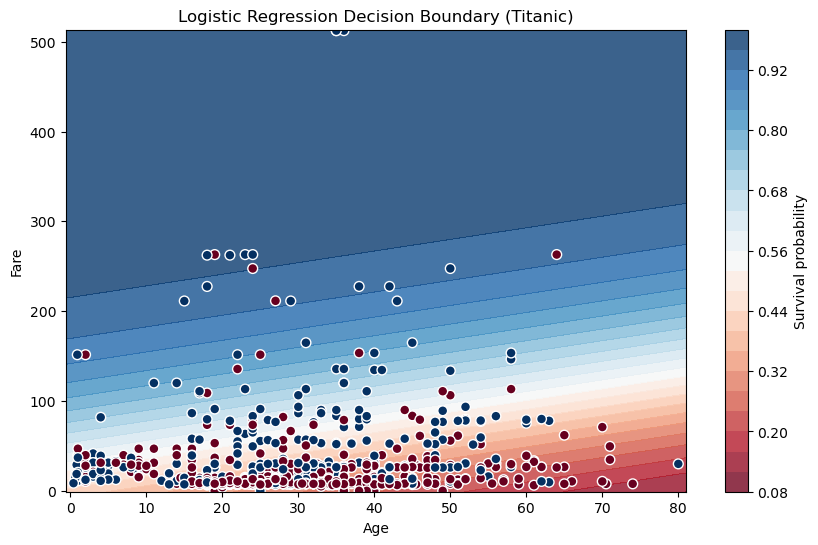

In [69]:
# Create a mesh grid over the feature space
x_min, x_max = X["age"].min() - 1, X["age"].max() + 1
y_min, y_max = X["fare"].min() - 1, X["fare"].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Flatten the grid and make predictions
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.8)
plt.colorbar(label='Survival probability')
plt.scatter(X["age"], X["fare"], c=y, cmap="RdBu", edgecolor="white", s=50)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Logistic Regression Decision Boundary (Titanic)")

What this shows:

- Red = low survival probability, Blue = high.
- The boundary where color shifts is the model’s decision line (probability ~0.5).
- You can see how age and fare interact in determining survival according to the model.